# Subproject 1 – Used Car Prices Prediction
Machine Learning – M.Sc. in Electrical and Computer Engineering


Importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Reading files using pandas library

In [34]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_sample_submission = pd.read_csv("sample_submission.csv")


# Exploratory Data Analysis (EDA)

using the shape() method, will give the dimension of the data i am working with.

In [4]:
# for train data

df_train.shape

(188533, 13)

In [5]:
# for test data

df_test.shape

(125690, 12)

the head() method will show first rows of data but limited, "n" can be passed as an argument, if we want specific amount to row to be shown.
passing n as an argument here will show the first n rows from index (0 to n-1).

In [ ]:
# for train data

df_train.head()

In [ ]:
# for test data

df_test.head()

Using info() method to see the summary details about the dataframes like the index, datatypes, columns, non-null values and the memory usage.

In [ ]:
#  for the train data

df_train.info()

In [ ]:
#  for the test data

df_test.info()

checking the data types of the data we are dealing with

In [ ]:
# for train data

df_train.dtypes

In [ ]:
# for test data

df_test.dtypes

the describitution of the dataset

In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

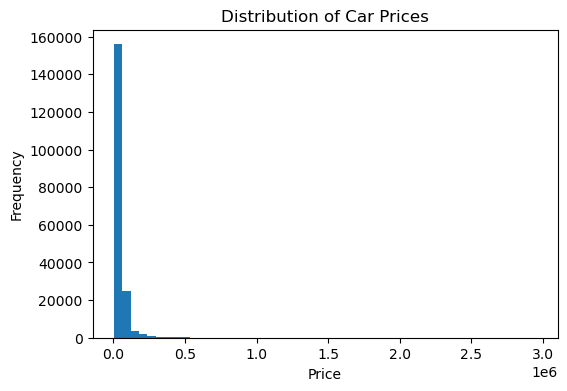

In [15]:
# from the distribution plot below, we can say that the the target ['price'] of the train data is skewed with fewer high-priced car.

# The target distribution was analyzed to identify skewness and outliers in used car prices, which directly affects model choice and potential target transformations.

# price distrubution  visualization
plt.figure(figsize=(6,4))
plt.hist(df_train["price"], bins=50)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

separating numerical column and categorical column

In [7]:
#  for train data

numerical_columns = df_train.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df_test.select_dtypes(include=["object", "bool", "category"]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: Index(['id', 'model_year', 'milage', 'price'], dtype='object')
Categorical columns: Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')


In [ ]:
#this plot will show the 'brand' category showing that a small number of dataset dominate compare to other brands

# this was conducted to identify dominant and rare brands, guiding the choice of encoding strategies and dimensionality control. wecan also change the column to other categorical columns too for better encoding strategies.

plt.figure(figsize=(6,4))
df_train["brand"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Car Brands")
plt.ylabel("Count")
plt.show()




In [ ]:
# The relationship between price and fuel type was analyzed to verify its influence on vehicle value and justify categorical encoding.

plt.figure(figsize=(6,4))
df_train.boxplot(column="price", by="fuel_type")
plt.title("Price vs Fuel Type")
plt.suptitle("")  # removes automatic subtitle
plt.show()

Missing values

the pandas library provides isnull() to check the column with missing values, sum() will give the total sum of the missing values if any exist,  and the sort_values for sorting.

In [38]:
#  for train data

train_missing_values =df_train.isnull().sum().sort_values(ascending=False)
train_missing_columns = df_train.columns[df_train.isna().any()].tolist()
train_missing_columns

['fuel_type', 'accident', 'clean_title']

In [ ]:
#for test data

df_test.isnull().sum().sort_values(ascending=False)

In [ ]:
# from pandas dataframe, we can use the .mean() method to find the mean for the each colums with missing values, then convert it to percentage multiplying be 100.

#  Missing value analysis was performed to quantify data incompleteness and justify the imputation strategies applied during preprocessing.

train_missing_percentage = df_train.isnull().mean().sort_values(ascending=False) * 100
train_missing_percentage[train_missing_percentage > 0]

# the plot for columns with missing data
(df_train.drop(['price'], axis=1).isnull().mean() * 100).plot(kind="bar")
plt.title("Missing values")
plt.ylabel("missing")
plt.show()
